## SPATIAL ANALYSIS

In [58]:
import os
import requests

import numpy as np
import pandas as pd
import seaborn as sns

import folium
import geopandas as gpd
import fiona
import shapely


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [48]:
import zipfile
from zipfile import ZipFile

folder_root = '/Users/josefinebjornholm/Documents/GitHub/Gun_Violence_E19/maps/tl_2017_us_county'

os.chdir(folder_root)
zip_file = zipfile.ZipFile(os.path.join(folder_root,'tl_2017_us_county.shp.zip'))
zip_file.extractall()
zip_file.close()
county_data = gpd.read_file('tl_2017_us_county.shp')
os.remove(os.path.join(folder_root, 'tl_2017_us_county.shp'))



In [49]:
county_data['Statecode'] = pd.to_numeric(county_data['STATEFP'])
county_data = county_data[['Statecode','NAME', 'NAMELSAD','geometry']]

In [50]:
state_names = pd.read_csv('state-geocodes-v2016.csv', sep = ';')
state_names = state_names[['State (FIPS)','Name']]
state_names

,State (FIPS),Name
0,0,Northeast Region
1,0,New England Division
2,9,Connecticut
3,23,Maine
4,25,Massachusetts
...,...,...
59,2,Alaska
60,6,California
61,15,Hawaii
62,41,Oregon


In [52]:
geo_county = pd.merge(county_data,state_names,left_on=['Statecode'], right_on = ['State (FIPS)'], how = 'left')

In [80]:
geo_county = geo_county[geo_county['Name']!='Alaska']
geo_county = geo_county[geo_county['Name']!='Hawaii']
geo_county = geo_county[geo_county['Name']!='Districts of Columbia']

(0, 52.58366655)

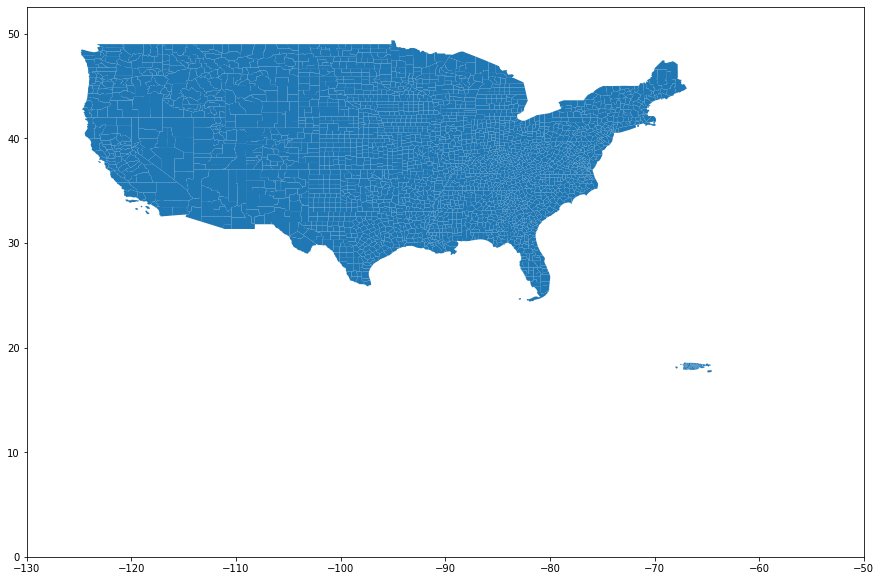

In [82]:
fig, ax = plt.subplots(figsize = (15,15))
geo_county.plot(ax = ax)

plt.xlim(right = -50)
plt.xlim(left = -130)
plt.ylim(bottom = 0)
